In [1]:
import numpy as np 
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Breast Cancer Dataset .csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
def diagnosis_value(diagnosis):
        if diagnosis=='M':
            return 1
        else:
            return 0
df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

In [5]:
df.shape


(569, 31)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0],test_size=0.2, random_state=2)

In [7]:
X_train.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.1241,0.22640,0.1326,0.10480,0.2250,0.08321
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,...,11.68,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083
198,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.06772,0.1767,0.05529,...,23.36,32.06,166.40,1688.0,0.1322,0.56010,0.3865,0.17080,0.3193,0.09221
203,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,...,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.4646,0.20130,0.4432,0.10860
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.1909,0.26980,0.4023,0.14240,0.2964,0.09606


In [8]:
X_train.shape

(455, 30)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train


array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

In [11]:
X_train.shape


(455, 30)

In [12]:
y_train.shape

(455,)

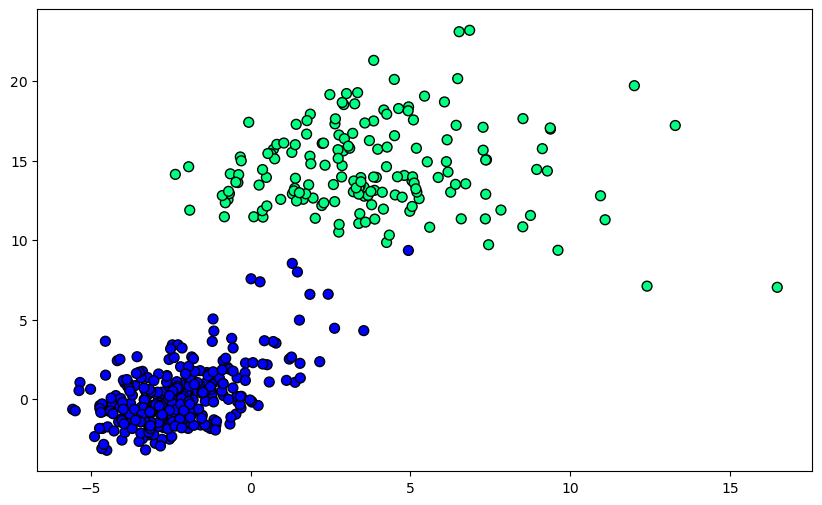

In [13]:
from sklearn.decomposition import PCA
# Assuming X_train and y_train are already defined
# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Increase separation by adding a constant value to one class
X_train_pca[y_train == 1, 1] += 15 # Shifts the second component of class 1


plt.figure(figsize=(10, 6))

# Plot the scatter plot with increased separation
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c= y_train, cmap='winter', edgecolor='k', s=50)
plt.show()

In [14]:
# we write our own implementation of logistic regression through step function 
def perceptron_step(X,y):
    X=np.insert(X, 0, 1, axis=1)
    weights= np.ones(X.shape[1])
    lr=0.1

    for i in range(1000):
        j=np.random.randint(0,X_train.shape[0]);
        y_hat=step(np.dot(X[j], weights))
        weights = weights + lr * (y.iloc[j] - y_hat) * X[j]

    return weights[0], weights[1:]

def predict_step(X, weights, bias):
    X = np.insert(X, 0, 1, axis=1)  
    weights_with_bias = np.insert(weights, 0, bias)  
    probabilities = step(np.dot(X, weights_with_bias)) 
    return probabilities 

In [15]:
def step(z):
    return np.where(z < 0, 0, 1) 

In [16]:
intercept_step, coef_step= perceptron_step(X_train,y_train)

In [17]:
intercept_step

-0.29999999999999993

In [18]:
coef_step

array([ 1.08162362,  0.2066259 ,  1.01156192,  1.1807803 ,  0.48950797,
       -0.14591465,  0.44850409,  0.67475788,  0.28794571,  0.0832939 ,
        1.21402776,  1.06843288,  0.9328604 ,  1.2802265 , -0.06089389,
       -1.18579044, -0.82859625, -0.30771258, -0.13903382, -0.98654328,
        1.3224758 ,  0.83706086,  1.16213332,  1.40657395,  1.15930249,
        0.11975729,  0.52145888,  0.84115869,  0.68012782,  0.0324199 ])

In [19]:
m= -(coef_step[0]/coef_step[1])
b= -(intercept_step/coef_step[1])

In [20]:
x_input_step= np.linspace(-20, 30, 100)
y_input_step= m*x_input_step +b

In [21]:
y_pred_step= predict_step(X_test, coef_step, intercept_step)
y_pred_step

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1])

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
accuracy_score(y_test, y_pred_step)*100

95.6140350877193

In [24]:
f1_score(y_test, y_pred_step)*100

94.6236559139785

In [25]:
precision_score(y_test, y_pred_step)*100

91.66666666666666

In [26]:
recall_score(y_test, y_pred_step)*100

97.77777777777777

(-10.0, 20.0)

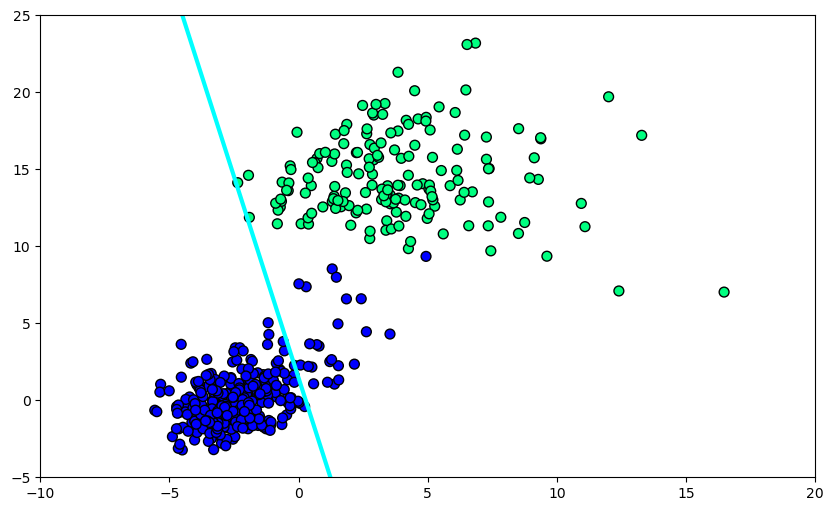

In [27]:
# we plot the graph for step function 
plt.figure(figsize=(10, 6))
plt.plot(x_input_step, y_input_step, color='cyan', linewidth=3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter',edgecolor='k', s=50)
plt.ylim(-5, 25)
plt.xlim(-10,20)

##### 

In [28]:
# we write our own implementation of logistic regression through sigmoid function 
def perceptron_sigmoid(X,y):
    X=np.insert(X, 0, 1, axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1

    for i in range(1500):
        j=np.random.randint(0,X.shape[0])
        y_hat=sigmoid(np.dot(X[j], weights))
        weights = weights + lr * (y.iloc[j] - y_hat) * X[j]

    return weights[0], weights[1:]

def predict_sigmoid(X, weights, bias):
    X = np.insert(X, 0, 1, axis=1)  
    weights_with_bias = np.insert(weights, 0, bias)  
    probabilities = sigmoid(np.dot(X, weights_with_bias))  
    return (probabilities >= 0.5).astype(int)  

In [29]:
# we define the sigmoid function 
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [30]:
intercept_sigmoid,coef_sigmoid= perceptron_sigmoid(X_train,y_train)

In [31]:
intercept_sigmoid

0.09745860639859621

In [32]:
coef_sigmoid

array([ 1.20611115,  0.7942849 ,  1.1422157 ,  1.33301422,  0.48359337,
       -0.34499413,  0.87329376,  0.97455245, -0.09189394, -0.47204693,
        1.54295383,  0.89950589,  1.23849822,  1.5059802 ,  0.28288466,
       -0.45861488, -0.1801727 ,  0.0774179 , -0.0697136 , -0.47632417,
        1.52933498,  1.3030714 ,  1.43216418,  1.6058783 ,  1.14353923,
        0.34021481,  0.81032204,  0.89523969,  0.5504875 ,  0.23451093])

In [33]:
m= -(coef_sigmoid[0]/coef_sigmoid[1])
b= -(intercept_sigmoid/coef_sigmoid[1])

In [34]:
x_input_sigmoid= np.linspace(-20,30,100)
y_input_sigmoid= m*x_input_sigmoid + b

In [35]:
y_pred_sigmoid= predict_sigmoid(X_test, coef_sigmoid, intercept_sigmoid)
y_pred_sigmoid

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1])

In [36]:
accuracy_score(y_test, y_pred_sigmoid)*100

94.73684210526315

In [37]:
f1_score(y_test, y_pred_sigmoid)*100

93.33333333333333

In [38]:
precision_score(y_test, y_pred_sigmoid)*100

93.33333333333333

In [39]:
recall_score(y_test, y_pred_sigmoid)*100

93.33333333333333

(-13.0, 20.0)

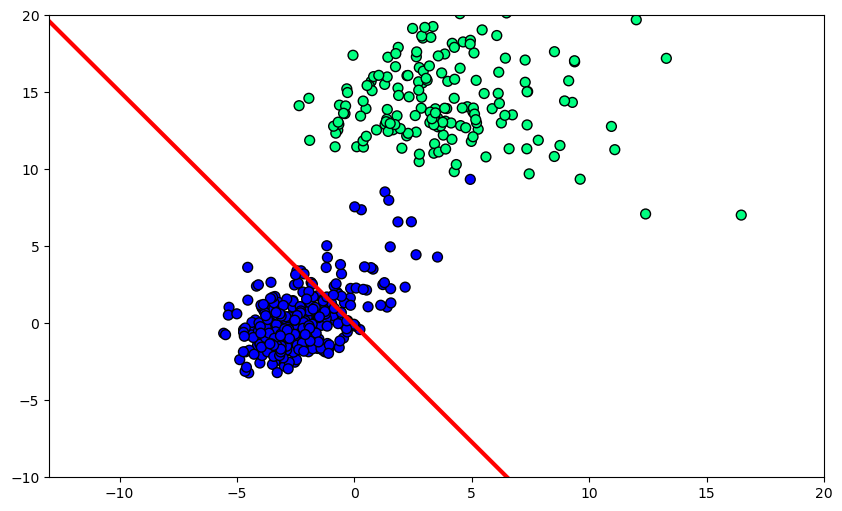

In [40]:
# we plot the graph for sigmoid fucntion 
plt.figure(figsize=(10,6))
plt.plot(x_input_sigmoid, y_input_sigmoid, color='red', linewidth=3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter', edgecolor='k', s=50)
plt.ylim(-10, 20)
plt.xlim(-13,20)

(-13.0, 20.0)

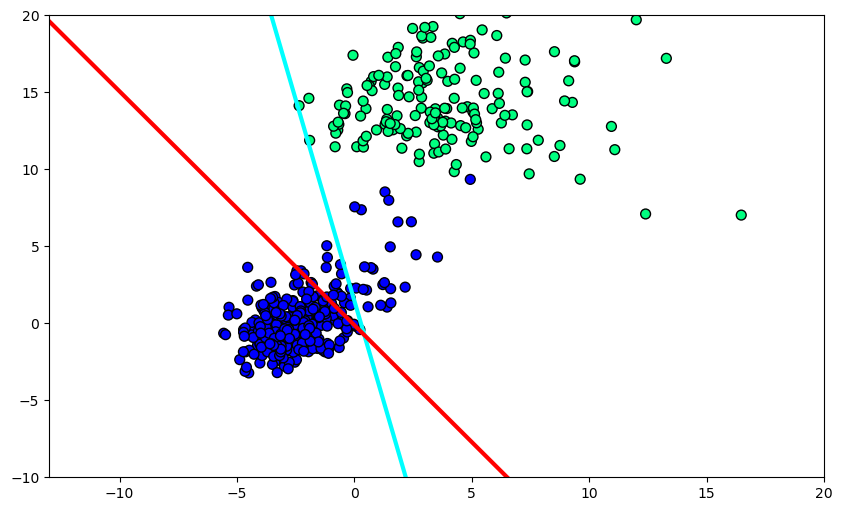

In [41]:
# we plot above 2 graphs for better comparison
plt.figure(figsize=(10,6))
plt.plot(x_input_step, y_input_step, color='cyan', linewidth=3) # step
plt.plot(x_input_sigmoid, y_input_sigmoid, color='red', linewidth=3) # sigmoid 
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter', edgecolor='k', s=50)
plt.ylim(-10, 20)
plt.xlim(-13,20)

In [42]:
# we use the inbuilt scikit learn library for logistic regression 
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(X_train,y_train)

LogisticRegression()

In [43]:
lor.coef_

array([[ 0.53985391,  0.25214061,  0.49456043,  0.61045146,  0.17406619,
        -0.57798312,  0.65877728,  0.98024393, -0.11997381, -0.40647904,
         1.24795634,  0.10325774,  0.73120148,  0.93158422,  0.23099107,
        -0.61431692,  0.03231823,  0.20637638, -0.27288293, -0.73956073,
         1.04015025,  1.09620691,  0.88548864,  1.02686306,  0.92729009,
         0.07540269,  0.76656759,  0.73296575,  0.66992505,  0.52093938]])

In [44]:
lor.intercept_

array([-0.23928072])

In [45]:
m= -(lor.coef_[0][0]/lor.coef_[0][1])
b= -(lor.intercept_/lor.coef_[0][1])

In [46]:
x_input_lib = np.linspace(-20, 30, 100)
y_input_lib = m*x_input_lib+b

In [47]:
y_pred_lib= lor.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred_lib)*100

97.36842105263158

In [49]:
f1_score(y_test, y_pred_lib)*100

96.7032967032967

In [50]:
precision_score(y_test, y_pred_lib)*100

95.65217391304348

In [51]:
recall_score(y_test, y_pred_lib)*100

97.77777777777777

(-13.0, 20.0)

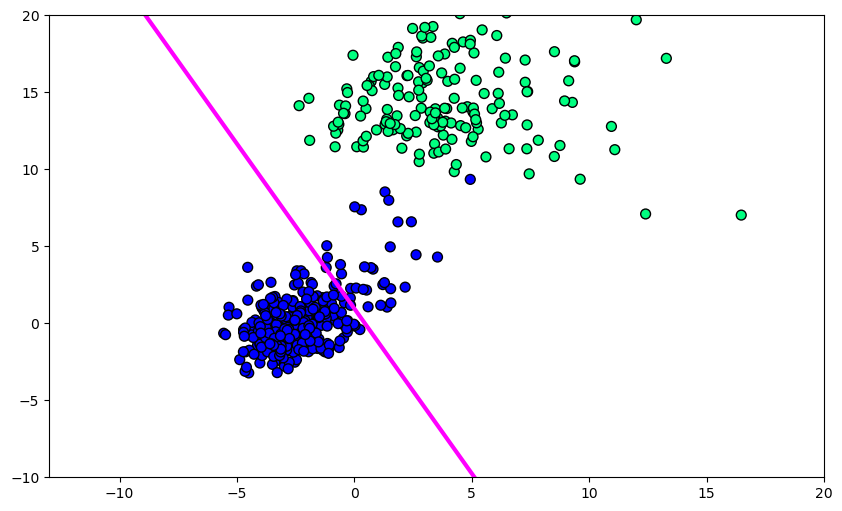

In [52]:
# we plot the graph for inbuilt logistic regression library
plt.figure(figsize=(10,6))
plt.plot(x_input_lib, y_input_lib, color='magenta', linewidth=3) # library
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter', edgecolor='k', s=50)
plt.ylim(-10, 20)
plt.xlim(-13,20)

(-13.0, 20.0)

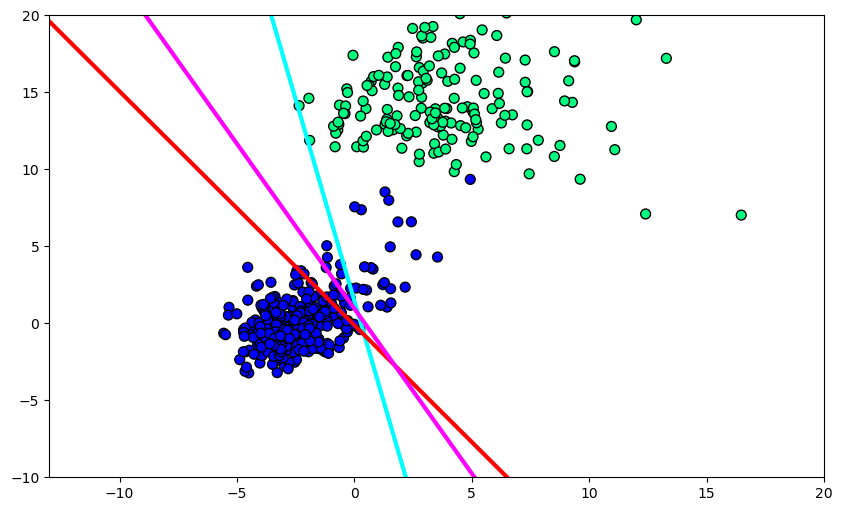

In [53]:
# we plot all three graphs together for comparison
plt.figure(figsize=(10,6))
plt.plot(x_input_step, y_input_step, color='cyan', linewidth=3) # step
plt.plot(x_input_sigmoid, y_input_sigmoid, color='red', linewidth=3) # sigmoid 
plt.plot(x_input_lib, y_input_lib, color='magenta', linewidth=3) # library
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter', edgecolor='k', s=50)
plt.ylim(-10, 20)
plt.xlim(-13,20)

In [54]:
def gd(X, y, lr=0.01, epochs=1000, reg_strength=0.01):
    X = np.insert(X, 0, 1, axis=1)  
    weights = np.zeros(X.shape[1])  

    for i in range(epochs):
        y_hat = sigmoid(np.dot(X, weights))  
        error = y_hat - y 
        
       
        gradient = np.dot(X.T, error) / X.shape[0] + reg_strength * weights
        gradient[0] -= reg_strength * weights[0] 
        
        weights -= lr * gradient  
    return weights[1:], weights[0]  
    
def predict_gd(X, weights, bias):
    X = np.insert(X, 0, 1, axis=1)  
    weights_with_bias = np.insert(weights, 0, bias)  
    probabilities = sigmoid(np.dot(X, weights_with_bias))  
    return (probabilities >= 0.5).astype(int) 

In [55]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [56]:
coef_gd, intercept_gd= gd(X_train,y_train)

In [57]:
coef_gd

array([ 0.37809675,  0.29529832,  0.37305189,  0.37252492,  0.12741797,
        0.12618031,  0.30425683,  0.37846023,  0.09791058, -0.16727886,
        0.31113635,  0.04177406,  0.26368894,  0.28242558,  0.00843031,
       -0.08785711, -0.04185623,  0.06234206, -0.06583947, -0.14884659,
        0.44400049,  0.38412853,  0.4261644 ,  0.42053825,  0.28597562,
        0.18740035,  0.27342344,  0.38365648,  0.24728968,  0.08755745])

In [58]:
intercept_gd

-0.36595245022098183

In [59]:
m=-(coef_gd[0]/coef_gd[1])
b=-(intercept_gd/coef_gd[1])

In [60]:
x_input_gd = np.linspace(-20,30,100)
y_input_gd = m*x_input_gd + b

In [61]:
y_pred_gd= predict_gd(X_test, coef_gd, intercept_gd)
y_pred_gd

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1])

In [62]:
accuracy_score(y_test, y_pred_gd)*100

98.24561403508771

In [63]:
f1_score(y_test, y_pred_gd)*100

97.72727272727273

In [64]:
precision_score(y_test, y_pred_gd)*100

100.0

In [65]:
recall_score(y_test, y_pred_gd)*100

95.55555555555556

(-13.0, 20.0)

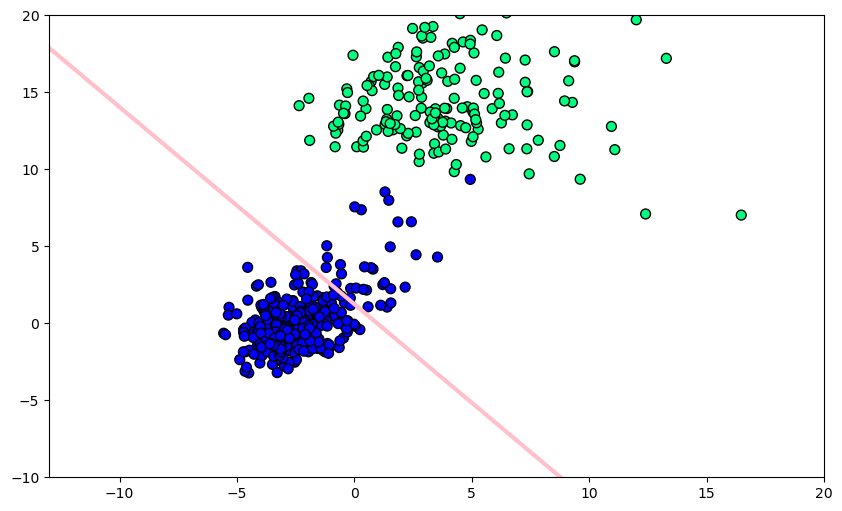

In [66]:
plt.figure(figsize=(10,6))
plt.plot(x_input_gd, y_input_gd, color='pink', linewidth=3) # gd
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter', edgecolor='k', s=50)
plt.ylim(-10, 20)
plt.xlim(-13,20)

(-13.0, 20.0)

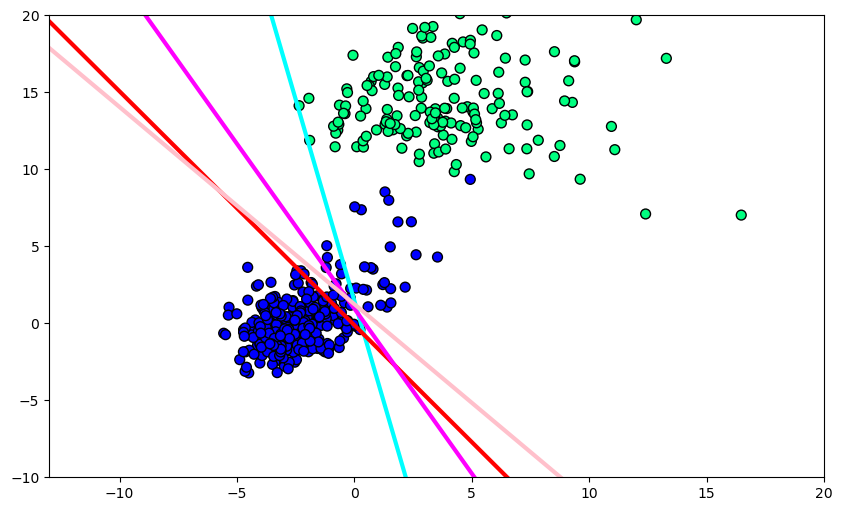

In [67]:
# we plot all three graphs together for comparison
plt.figure(figsize=(10,6))
plt.plot(x_input_step, y_input_step, color='cyan', linewidth=3) # step
plt.plot(x_input_sigmoid, y_input_sigmoid, color='red', linewidth=3) # sigmoid 
plt.plot(x_input_lib, y_input_lib, color='magenta', linewidth=3) # library
plt.plot(x_input_gd, y_input_gd, color='pink', linewidth=3) # gd
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter', edgecolor='k', s=50)
plt.ylim(-10, 20)
plt.xlim(-13,20)